# Electric Machinery Fundamentals 5th edition
## Chapter 3

## Animation: Three-phase fluxes 

(based on [Example 3-1](Ch3-Example_3-01.ipynb))

**Calculate the net magetic field produced by a three-phase stator (adapted for 50Hz).**

Showing a 2-pole and a 4-pole machine side by side

Import the PyLab namespace (provides set of useful commands and constants like $\pi$):

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set up the basic conditions:

In [2]:
bmax = 1           # Normalize bmax to 1
freq = 50          # [Hz]
w = 2*pi*freq      # [rad/s] angluar velocity

First, generate the three component magnetic fields

In [3]:
# specify number of pole pairs = 2 * number of poles
pp = 2
# create the time vector
t = linspace(0, 2*pp/freq, 100*pp)   # 100 values for one period
wt = w*t   # we are going to use this quite often

# amplitudes (changed them to see effect of unsymmetry):
B_amp = [[1.0], [1.0], [1.0]]
# time variants
B_time = array([sin(wt),
                sin(wt-2*pi/3),
                sin(wt+2*pi/3)])
# time variants for pole pairs
Bpp_time = array([sin(wt/pp),
                sin((wt-2*pi/3)/pp),
                sin((wt+2*pi/3)/pp)])
# vectorial shifts
B_shift = [[cos(0) + 1j*sin(0)],
           [cos(2*pi/3) + 1j*sin(2*pi/3)], 
           [cos(-2*pi/3) + 1j*sin(-2*pi/3)]]
# vectorial shifts for pole pairs
Bpp_shift = [[cos(0) + 1j*sin(0)],
           [cos(2*pi/3/pp) + 1j*sin(2*pi/3/pp)], 
           [cos(-2*pi/3/pp) + 1j*sin(-2*pi/3/pp)]]
# all combined
B   = B_amp * B_time   * B_shift
Bpp = B_amp * Bpp_time * Bpp_shift

Calculate total flux vector `Btot`:

In [4]:
Btot = B[0] + B[1] + B[2]
Bpptot = Bpp[0] + Bpp[1] + Bpp[2]

Calculate a circle representing the expected maximum value of `Btot`:

In [5]:
circle = 1.02 * 1.5 * (cos(wt) + 1j*sin(wt))

**Generating  the animation:**

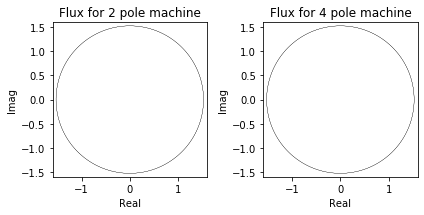

In [6]:
# First set up the figure, the axis, and the plot element we want to animate
from matplotlib import animation
fig = figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
ax1.set_title('Flux for 2 pole machine')
ax1.set_xlabel('Real')
ax1.set_ylabel('Imag')
ax1.set_xlim(-1.6, 1.6)
ax1.set_ylim(-1.6, 1.6)
#ax1.set_aspect('equal', 'datalim')
ax1.set_aspect('equal')
ax2.set_title('Flux for {:.0f} pole machine'.format(2*pp))
ax2.set_xlabel('Real')
ax2.set_ylabel('Imag')
ax2.set_xlim(-1.6, 1.6)
ax2.set_ylim(-1.6, 1.6)
ax2.set_aspect('equal')
# set up the different line colours
la, lb, lc, ltot, circ = ax1.plot([], [], 'red', 
                            [], [], 'green', 
                            [], [], 'blue', 
                            [], [], 'magenta', 
                            [], [], 'magenta', 
                            lw=2)
pa, pb, pc, ptot, pcirc = ax2.plot([], [], 'red', 
                            [], [], 'green', 
                            [], [], 'blue', 
                            [], [], 'magenta', 
                            [], [], 'magenta', 
                            lw=2)

tight_layout()  # sometimes useful when sub-plots get a bit crowded

# initialization function: plot the background of each frame
def init():
    ax1.plot(real(circle), imag(circle), 'black', lw=0.1);
    ax2.plot(real(circle), imag(circle), 'black', lw=0.1);
    return


# animation function.  This is called sequentially
def animate(simData):
    i = simData - 1 # python index starts at 0 
    re = [real(B[0,i]), real(B[1,i]), real(B[2,i])]
    im = [imag(B[0,i]), imag(B[1,i]), imag(B[2,i])]
    la.set_data([0, re[0]], [0, im[0]])
    lb.set_data([re[0], re[0]+re[1]], [im[0], im[0]+im[1]])
    lc.set_data([re[0]+re[1], re[0]+re[1]+re[2]], [im[0]+im[1], im[0]+im[1]+im[2]])
    ltot.set_data([0, real(Btot[i])], [0, imag(Btot[i])])
    circ.set_data(real(Btot[:i]),imag(Btot[:i]))
    pre = [real(Bpp[0,i]), real(Bpp[1,i]), real(Bpp[2,i])]
    pim = [imag(Bpp[0,i]), imag(Bpp[1,i]), imag(Bpp[2,i])]
    pa.set_data([0, pre[0]], [0, pim[0]])
    pb.set_data([pre[0], pre[0]+pre[1]], [pim[0], pim[0]+pim[1]])
    pc.set_data([pre[0]+pre[1], pre[0]+pre[1]+pre[2]], [pim[0]+pim[1], pim[0]+pim[1]+pim[2]])
    ptot.set_data([0, real(Bpptot[i])], [0, imag(Bpptot[i])])
    pcirc.set_data(real(Bpptot[:i]),imag(Bpptot[:i]))
    return
    
# call the animator:  
anim = animation.FuncAnimation(fig, animate, init_func=init, interval=50)   

If run "normally" (and not in "inline" mode like we are doing here) the command above would have opened a window with the animation running.
On the server we can only run "inline" mode but there is a solution to simply generate the animation as a video and embed it right here:

In [7]:
from IPython.display import HTML
HTML(anim.to_html5_video())